# Лабароторная работа 4

# Анимация качения треугольника Рело по квадрату

Федоренко Алексей Жанович, 21.03.2025

## Задание 5.1. Начальное положение треугольника Рело и квадрата

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo

In [2]:
n = 3 
center =[0.,0.]
r = 10 
N = 100 

In [3]:
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)

$\color{red}\text{Постройте}$ матрицу `square` для покоординатного описания границы квадрата

In [4]:
a=np.array(center)-r/2
b=np.array(center)+r/2
square = np.array(([a,a],[a,b],[b,b],[b,a],[a,a]))

$\color{red}\text{Изобразите}$ в одной системе координат квадрат, треугольник Рело и точку центра треугольника Рело.

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

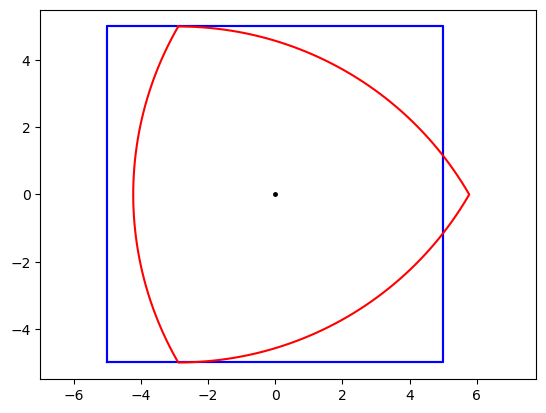

In [5]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

$\color{red}\text{Определите}$ величину вектора сдвига `shift`. $\color{red}\text{Поясните}$ в
тексте документа формулу для расчета вектора сдвига.


In [6]:
center=np.array(center)
l = r*math.sqrt(2*(1-math.cos(math.pi/n)))
R = l/(2*math.sin(math.pi/n))
shift=[R-r/2,0]
relo_matrix_shifted = relo_matrix - shift
center-=shift
center=list(center)

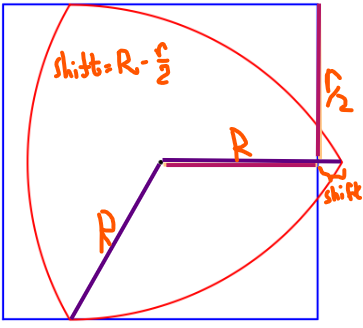

рассмотрев треугольник рело: $shift=R-\frac{r}{2}$, ult $R$ - радиус, а $r$ - ширина треугольника Рело

$\color{red}\text{Изобразите}$ в одной графической области квадрат, треугольник Рело после сдвига и точку центра треугольника Рело после сдвига.

(-5.5, 5.500000000000003, -5.5, 5.500000000000001)

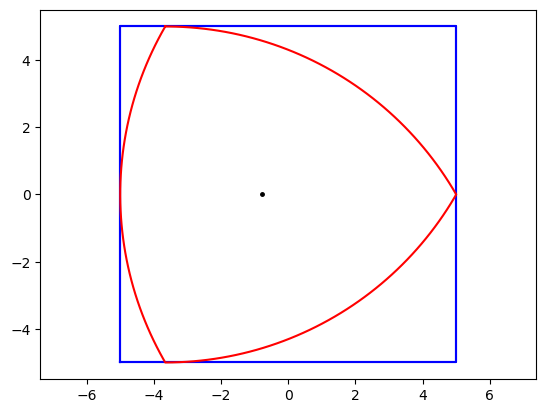

In [7]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

## Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

In [8]:
N_frames = 100

In [9]:
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

In [10]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

(-5.5, 5.500000000000003, -5.5, 5.500000000000001)

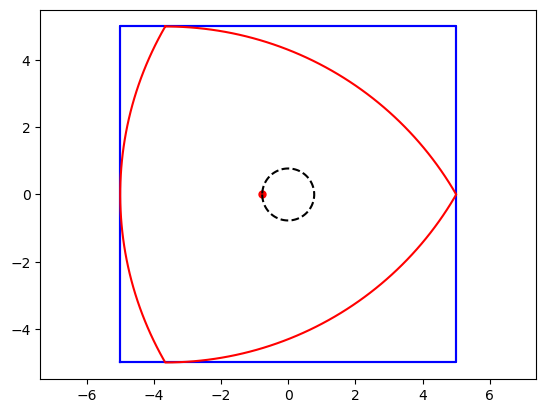

In [11]:
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

$\color{red}\text{Напишите пользовательскую функцию}$ трех аргументов `draw_frame(r, N_frames, frame)` , которая изображает кадр с номером `frame` при поступательном движении центра треугольника Рело по окружности против часовой стрелки.
* Аргумент `r` задает ширину треугольника Рело 
* Аргумент `N_frames` задает количества кадров для прохождения центром треугольника Рело полной окружности
* Аргумент `frame` задаёт номер кадра. По умолчанию `frame` = 0
* Функция осуществляет визуализацию и не возвращает объекты

Для функции `draw_frame` $\color{red}\text{укажите}$ аннотации типов и $\color{red}\text{оформите}$
строки документации. **Переменные из глобальной области
видимости в теле функции использовать нельзя!**


In [12]:
def draw_frame(r: float, N_frames: int, frame: int = 0) -> None:
    """
    do: Изображает один кадр поступательного движения центра треугольника Рело по окружности против часовой стрелки
    arguments:  r - ширина треугольника Рело,
                N_frames - количество создаваемых кадров для прохождения центром полной окружности,
                frame - номер кадра (по умолчанию 0).
    result: None
    """
    n = 3 
    center =[0.,0.]
    r = 10 
    N = 100 
    relo_matrix = relo.regular_polygon_Relo(n,r=r, center=center, N=100)
    a=np.array(center)-r/2
    b=np.array(center)+r/2
    square = np.array(([a,a],[a,b],[b,b],[b,a],[a,a]))
    l = r*math.sqrt(2*(1-math.cos(math.pi/n)))
    R = l/(2*math.sin(math.pi/n))
    shift=[R-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')

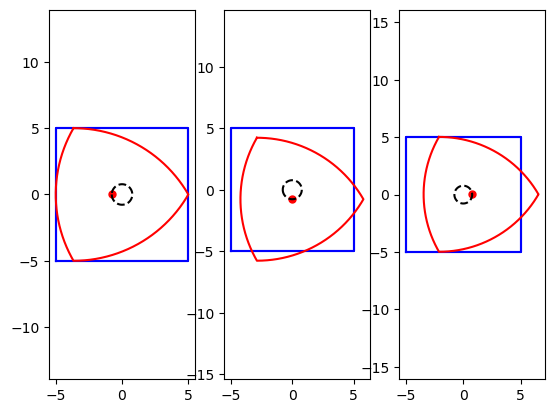

In [13]:
plt.figure()
N_frames = 100
plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=25)
plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=50)

$\color{red}\text{Реализуйте анимацию}$ поступательного движения треугольника Рело по окружности против часовой стрелки. При построении анимации возьмите за основу функцию `draw_frame` , но не используйте ее напрямую в качестве аргумента функции `FuncAnimation` (модуль `animation` библиотеки `matplotlib` ).


In [14]:
from matplotlib.animation import FuncAnimation
%matplotlib widget

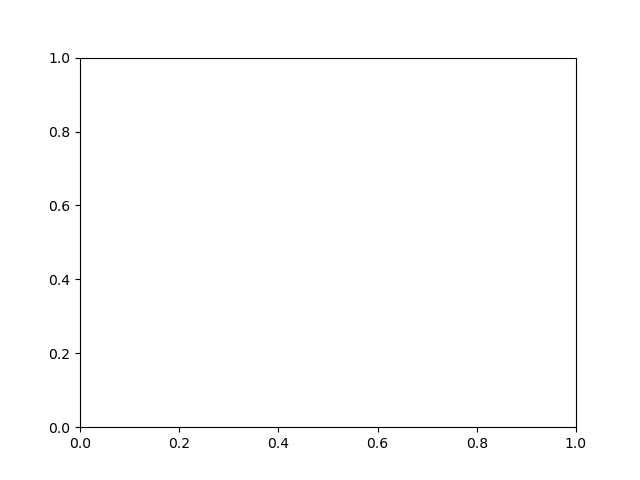

In [15]:
fig1 = plt.figure()
ax1 = plt.axes()

def init():
    global mid, relo_triangle, relo_matrix, center_frame
    N_frames = 100
    n = 3 
    center =[0.,0.]
    r = 10.
    N = 100 
    
    relo_matrix = relo.regular_polygon_Relo(n,r=r, center=center, N=100)
    a=np.array(center)-r/2
    b=np.array(center)+r/2
    square = np.array(([a,a],[a,b],[b,b],[b,a],[a,a]))
    l = r*math.sqrt(2*(1-math.cos(math.pi/n)))
    R = l/(2*math.sin(math.pi/n))
    shift=[R-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])
    ax1.clear()
    relo_triangle, = ax1.plot(relo_matrix[:, 0], relo_matrix[:, 1], 'r-', markersize = 15)
    ax1.plot(square[:, 0], square[:, 1], 'b-')
    ax1.plot(center_frame[:, 0], center_frame[:, 1], 'k--')
    mid, = ax1.plot([], [],'r.')
    ax1.axis('equal')
    
def at_frame(frame):
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    relo_triangle.set_data(relo_matrix_shifted[:, 0], relo_matrix_shifted[:, 1])
    mid.set_data([center_frame[frame, 0]], [center_frame[frame, 1]])

FuncAnimation(fig1, at_frame, frames = N_frames, init_func = init, repeat = True, interval = 20)

In [16]:
plt.close('all')

# Задание 5.3. Анимация качения треугольника Рело

In [17]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

In [18]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])

(-6.3508529610858835, 6.350852961085886, -5.500000000000005, 5.500000000000001)

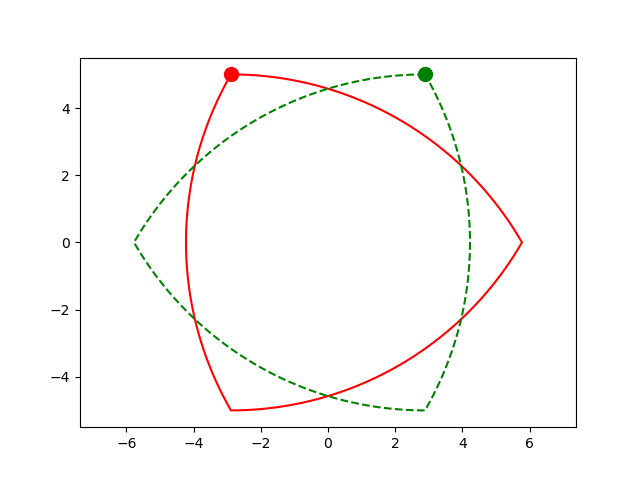

In [19]:
plt.figure()
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)
plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)
plt.axis('equal')

In [20]:
theta = np.linspace(0, 2*np.pi/3, N_frames)

(-5.501735269668723, 5.536440663043177, -5.5002878716042405, 5.506045303689058)

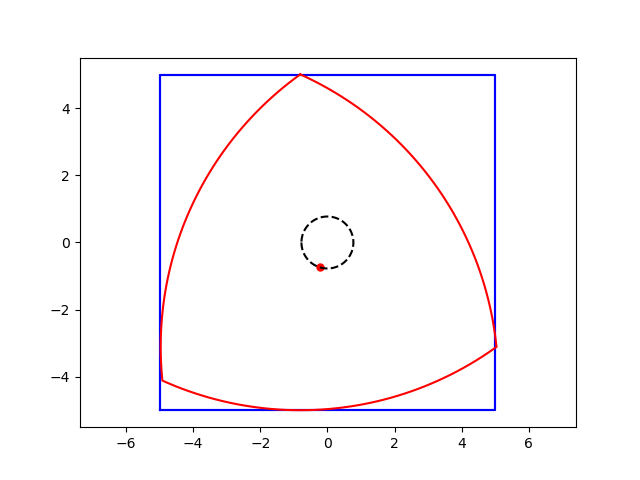

In [21]:
frame = 20
matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

$\color{red}\text{Измените}$ пользовательскую функцию `draw_frame(r, N_frames, frame)` , чтобы создавалось изображение кадра с номером `frame` для анимации качения треугольника Рело по квадрату.

In [22]:
def draw_frame2(r: float, N_frames: int, frame: int = 0) -> None:
    N_frames = 100
    n = 3 
    center =[0.,0.]
    r = 10.
    N = 100 
    theta = np.pi/3
    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])

    relo_matrix = relo.regular_polygon_Relo(n,r=r, center=center, N=100)
    a=np.array(center)-r/2
    b=np.array(center)+r/2
    square = np.array(([a,a],[a,b],[b,b],[b,a],[a,a]))
    shift=[R-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

    theta = np.linspace(0, 2 * np.pi / 3, N_frames)
    matrix= rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
    
    plt.plot(relo_matrix_changed[:,0], relo_matrix_changed[:,1], 'r-')    
    plt.plot(square[:,0], square[:,1], 'b-')
    plt.plot(center_frame[frame, 0], center_frame[frame, 1], 'r.')
    plt.plot(center_frame[:,0], center_frame[:,1], 'k--')

    plt.axis('equal')

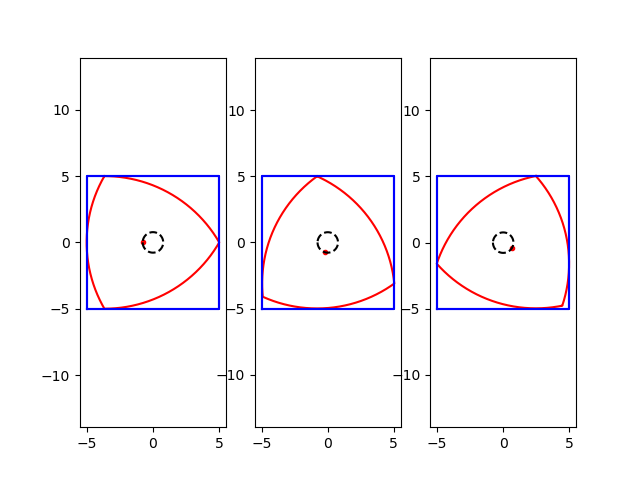

In [23]:
plt.figure()
plt.subplot(1,3,1)
draw_frame2(r=r, N_frames=N_frames)
plt.subplot(1,3,2)
draw_frame2(r=r, N_frames=N_frames, frame=20)
plt.subplot(1,3,3)
draw_frame2(r=r, N_frames=N_frames, frame=40)

$\color{red}\text{Реализуйте анимацию}$ качения треугольника Рело против часовой стрелки. При построении анимации возьмите за основу функцию `draw_frame` , но не используйте ее напрямую в качестве аргумента функции `FuncAnimation` (модуль `animation` библиотеки `matplotlib` ).

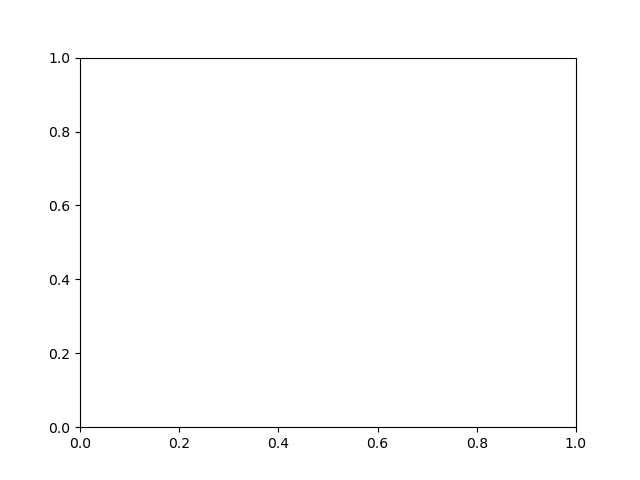

In [28]:
fig1 = plt.figure()
ax1 = plt.axes()
def init():
    global line, relo_triangle, relo_matrix, center_frame, rotate_matrix, theta
    N_frames = 100
    n = 3 
    center =[0.,0.]
    r = 10.
    N = 100 

    rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
 [-np.sin(theta), np.cos(theta)]])

    relo_matrix = relo.regular_polygon_Relo(n,r=r, center=center, N=100)
    a=np.array(center)-r/2
    b=np.array(center)+r/2
    square = np.array(([a,a],[a,b],[b,b],[b,a],[a,a]))
    shift=[R-r/2,0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0]*np.transpose([np.cos(t_center), np.sin(t_center)])

    theta = np.linspace(0, 2 * np.pi / 3, N_frames)
    matrix= rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
 + center_frame[frame])
    
    ax1.clear()
    relo_triangle, = ax1.plot(relo_matrix_changed[:, 0], relo_matrix_changed[:, 1], 'r-', markersize = 15)
    ax1.plot(square[:, 0], square[:, 1], 'b-')
    ax1.plot(center_frame[:, 0], center_frame[:, 1], 'k--')
    line, = ax1.plot([], [],'r.')
    
    ax1.axis('equal')
    
def at_frame(frame):
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix]) 
                         + center_frame[frame])
    
    relo_triangle.set_data(relo_matrix_changed[:, 0], relo_matrix_changed[:, 1])
    line.set_data([center_frame[frame, 0]], [center_frame[frame, 1]])

FuncAnimation(fig1, at_frame, frames = N_frames, init_func = init, repeat = True, interval = 20)

In [29]:
plt.close('all')